# Capstone Project - The Battle of Neighborhoods

### Installing and Importing Libraries

In [11]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json 
import requests
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import seaborn as sns
import scipy.stats
from scipy.stats import linregress

import folium 
from bs4 import BeautifulSoup
import lxml
import requests # library to handle requests

import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')
print('Libraries imported.')

Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2020.1.1-0, anaconda/win-64::certifi-2019.11.28-py37_0, anaconda/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::ca-certificates-2020.1.1-0, anaconda/win-64::openssl-1.1.1d-he774522_4, defaults/win-64::certifi-2019.11.28-py37_0
  - anaconda/win-64::ca-certificates-2020.1.1-0, anaconda/win-64::certifi-2019.11.28-py37_0, defaults/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::ca-certificates-2020.1.1-0, defaults/win-64::certifi-2019.11.28-py37_0, defaults/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::certifi-2019.11.28-py37_0, defaults/win-64::ca-certificates-2020.1.1-0, defaults/win-64::openssl-1.1.1d-he774522_4
  - defaults/win-64::ca-certificates-2020.1.1-0, defaults/win-64::certifi-2019.11.28-py37_0, defaults/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::certifi-2019.11.28-py37_0, anaconda/win-64::openssl-1.1.1d-he774522_4, defaults/win-64::ca-certificates-2020.1.1-0
  - anaconda

### Define Foursquare Credentials and Version

In [2]:
CLIENT_ID = 'RDLMTAMKGDD30NWQK3DLNRSAM35B3EYAXUCHNUJBNGSS3YOK' # your Foursquare ID
CLIENT_SECRET = 'K3AEMYFLWI32J5XHVKEKYYRZU3SN1AXDJITTPLU53HGQHW5F' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RDLMTAMKGDD30NWQK3DLNRSAM35B3EYAXUCHNUJBNGSS3YOK
CLIENT_SECRET:K3AEMYFLWI32J5XHVKEKYYRZU3SN1AXDJITTPLU53HGQHW5F


### Define a user_agent

In [3]:
address = 'Logan, Utah'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

41.7313447 -111.8348631


### Search for a specific venue category

In [4]:
search_query = 'park'
radius = 4000
print(search_query + ' .... OK!')

park .... OK!


### Define the corresponding URL

In [5]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=RDLMTAMKGDD30NWQK3DLNRSAM35B3EYAXUCHNUJBNGSS3YOK&client_secret=K3AEMYFLWI32J5XHVKEKYYRZU3SN1AXDJITTPLU53HGQHW5F&ll=41.7313447,-111.8348631&v=20180604&query=park&radius=4000&limit=30'

### Send the GET Request


In [6]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f16fa26008756568526c035'},
 'response': {'venues': [{'id': '531de09b498ee3958456ffc2',
    'name': 'Leetzow Business Park',
    'location': {'lat': 41.731306,
     'lng': -111.833449,
     'labeledLatLngs': [{'label': 'display',
       'lat': 41.731306,
       'lng': -111.833449}],
     'distance': 117,
     'cc': 'US',
     'city': 'Logan',
     'state': 'UT',
     'country': 'United States',
     'formattedAddress': ['Logan, UT', 'United States']},
    'categories': [{'id': '4bf58dd8d48988d130941735',
      'name': 'Building',
      'pluralName': 'Buildings',
      'shortName': 'Building',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/default_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1595341691',
    'hasPerk': False},
   {'id': '4be58b0bbcef2d7f58e703e5',
    'name': 'Merlin Olsen Park',
    'location': {'lat': 41.729900744747056,
     'lng': -111.828646789882,
     'labeledLatLngs': [

### Get relevant part of JSON and transform it into a pandas dataframe

In [7]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

C:\Users\Rachel Anderson\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.city,location.state,location.country,location.formattedAddress,location.postalCode,location.address,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,location.neighborhood
0,531de09b498ee3958456ffc2,Leetzow Business Park,"[{'id': '4bf58dd8d48988d130941735', 'name': 'B...",v-1595341691,False,41.731306,-111.833449,"[{'label': 'display', 'lat': 41.731306, 'lng':...",117,US,Logan,UT,United States,"[Logan, UT, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4be58b0bbcef2d7f58e703e5,Merlin Olsen Park,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",v-1595341691,False,41.729901,-111.828647,"[{'label': 'display', 'lat': 41.72990074474705...",540,US,Logan,UT,United States,"[Logan, UT 84321, United States]",84321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,51feaefd498e27af26488487,Kilowatt Park,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",v-1595341691,False,41.725337,-111.843557,"[{'label': 'display', 'lat': 41.725337, 'lng':...",984,US,Logan,UT,United States,"[Logan, UT, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4bc0c6cb2a89ef3bf61ef188,Cache Valley Fun Park,"[{'id': '4bf58dd8d48988d1e7941735', 'name': 'P...",v-1595341691,False,41.763370,-111.827191,"[{'label': 'display', 'lat': 41.76337031478518...",3621,US,North Logan,UT,United States,"[255 E 1770 N, North Logan, UT 84341, United S...",84341,255 E 1770 N,1894774,https://www.grubhub.com/restaurant/cache-valle...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN
4,5e52e19109326700070b6b25,Jones Neighborhood Park,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",v-1595341691,False,41.744394,-111.845045,"[{'label': 'display', 'lat': 41.744394, 'lng':...",1680,US,Logan,UT,United States,"[Logan, UT 84321, United States]",84321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Define information of interest and filter dataframe

In [8]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,postalCode,address,neighborhood,id
0,Leetzow Business Park,Building,41.731306,-111.833449,"[{'label': 'display', 'lat': 41.731306, 'lng':...",117,US,Logan,UT,United States,"[Logan, UT, United States]",NaN,NaN,NaN,531de09b498ee3958456ffc2
1,Merlin Olsen Park,Park,41.729901,-111.828647,"[{'label': 'display', 'lat': 41.72990074474705...",540,US,Logan,UT,United States,"[Logan, UT 84321, United States]",84321,NaN,NaN,4be58b0bbcef2d7f58e703e5
2,Kilowatt Park,Park,41.725337,-111.843557,"[{'label': 'display', 'lat': 41.725337, 'lng':...",984,US,Logan,UT,United States,"[Logan, UT, United States]",NaN,NaN,NaN,51feaefd498e27af26488487
3,Cache Valley Fun Park,Playground,41.763370,-111.827191,"[{'label': 'display', 'lat': 41.76337031478518...",3621,US,North Logan,UT,United States,"[255 E 1770 N, North Logan, UT 84341, United S...",84341,255 E 1770 N,NaN,4bc0c6cb2a89ef3bf61ef188
4,Jones Neighborhood Park,Park,41.744394,-111.845045,"[{'label': 'display', 'lat': 41.744394, 'lng':...",1680,US,Logan,UT,United States,"[Logan, UT 84321, United States]",84321,NaN,NaN,5e52e19109326700070b6b25
5,Ryan's Place Park,None,41.722665,-111.820350,"[{'label': 'display', 'lat': 41.722665462048, ...",1545,US,River Heights,UT,United States,"[River Heights, UT 84321, United States]",84321,NaN,NaN,4e123bbafa769d21e9f4495c
6,Willow Park Zoo,Park,41.719251,-111.846789,"[{'label': 'display', 'lat': 41.71925126514661...",1671,US,Logan,UT,United States,"[419 W 700 S, Logan, UT 84321, United States]",84321,419 W 700 S,"Woodruff, lo",4bcdf861b6c49c74dc4b9691
7,Denzil Stewart Nature Park,Park,41.729170,-111.817631,"[{'label': 'display', 'lat': 41.72917, 'lng': ...",1451,US,Logan,UT,United States,"[Logan, UT 84321, United States]",84321,NaN,NaN,4ffe1bf8e4b026d5cb6c4eb7
8,Logan Dog Park,None,41.718959,-111.844254,"[{'label': 'display', 'lat': 41.71895941755643...",1584,US,Logan,UT,United States,"[300 W. 700 S, Logan, UT 84321, United States]",84321,300 W. 700 S,NaN,4bb3dc794019a593858d38b8
9,Skate Park,Skate Park,41.723931,-111.850876,"[{'label': 'display', 'lat': 41.72393094400192...",1565,US,Logan,UT,United States,"[400-498 S 700 W, Logan, UT 84321, United States]",84321,400-498 S 700 W,NaN,4e1680df7d8b69590f4369db


### Map points

In [9]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=14) 

for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

### Population Data from ,https://www.utah-demographics.com/cities_by_population
### Number of parks and park acres  https://opendata.gis.utah.gov/ 
### City square mile converted to acres from https://www2.census.gov/geo/docs/maps-data/data/gazetteer/2018_Gazetteer/2018_gaz_place_49.txt
### Median Household Income https://en.wikipedia.org/wiki/List_of_municipalities_in_Utah

In [12]:
park_by_city = pd.read_csv('Desktop\ParksCount.csv',sep=';')
population_by_city = pd.read_csv('Desktop\population.csv',sep=';')
acres_by_city = pd.read_csv('Desktop\cityacres.csv',sep=';')
median_income = pd.read_csv('Desktop\MedianIncome.csv',sep=';')

### Combine dataframes and drop rows with NaN 

In [13]:
total_df = population_by_city.set_index('city').join(park_by_city.set_index('city'))
total_df = total_df.join(acres_by_city.set_index('city'))
total_df = total_df.join(median_income.set_index('city'))
total_df.dropna(inplace=True)
total_df['population_density']=total_df['population']/total_df['sqmile']

### Filter so we are only looking at simlar sized cities

In [14]:
total_filtered_df = total_df.query('10000 <= population <= 200000')
total_filtered_df

,population,park_acres,parks,sqmile,lat,long,total_acres,geoid,medium_income,population_density
city,,,,,,,,,,
Alpine,10498,178.431851,21.0,7.952,40.462942,-111.772433,5089.28,4900540.0,112727.0,1320.171026
Bluffdale,16358,153.027326,5.0,10.979,40.474551,-111.940262,7026.56,4906810.0,105391.0,1489.935331
Bountiful,43981,82.464873,8.0,13.204,40.872483,-111.861200,8450.56,4907690.0,69611.0,3330.884580
Brigham City,19601,92.762486,11.0,24.511,41.505904,-112.051418,15687.04,4908460.0,49760.0,799.681776
Cedar City,34764,66.396818,9.0,35.860,37.682874,-113.095539,22950.40,4911320.0,42216.0,969.436698
Cedar Hills,10083,26.208535,7.0,2.718,40.412028,-111.754266,1739.52,4911440.0,97039.0,3709.713024
Centerville,17587,40.523935,5.0,5.973,40.926297,-111.883339,3822.72,4911980.0,84436.0,2944.416541
Clearfield,32118,65.419434,8.0,7.713,41.097049,-112.017959,4936.32,4913850.0,52034.0,4164.138468
Clinton,22499,49.286532,8.0,5.932,41.138740,-112.066417,3796.48,4914290.0,76378.0,3792.818611


### Let's graph it and see what we have
### By acres

Text(11300.48, 290.193476, 'Logan')

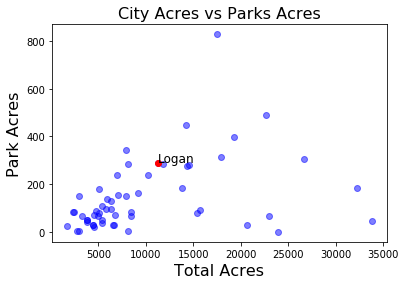

In [15]:
logan_df = total_filtered_df.loc['Logan',:]

plt.scatter(total_filtered_df.total_acres, total_filtered_df.park_acres,  alpha=0.5, color="blue")
# set x-axis label and specific size
plt.xlabel('Total Acres',size=16)
# set y-axis label and specific size
plt.ylabel('Park Acres',size=16)
# set plot title with specific size
plt.title('City Acres vs Parks Acres',size=16)

# Make Logan a different color
plt.scatter(logan_df.total_acres, logan_df.park_acres, color="red")

plt.savefig('City Acres vs Parks Acres.png', dpi=150)

style = dict(size=12, color='black')
plt.text(11300.48, 290.193476, "Logan", **style)


### Correlation Calculation between Total City Acres and Park Acres

In [16]:
scipy.stats.pearsonr(total_filtered_df['total_acres'], total_filtered_df['park_acres'])[0]

0.37511211841248077

### Graph by population vs number of parks

Text(51542, 32, 'Logan')

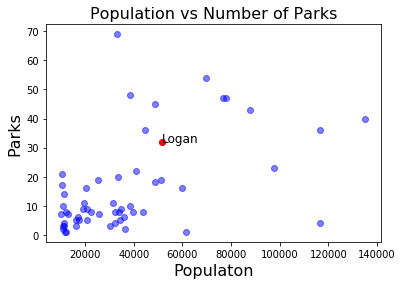

In [17]:
logan_df = total_filtered_df.loc['Logan',:]

plt.scatter(total_filtered_df.population, total_filtered_df.parks,  alpha=0.5, color="blue")
# set x-axis label and specific size
plt.xlabel('Populaton',size=16)
# set y-axis label and specific size
plt.ylabel('Parks',size=16)
# set plot title with specific size
plt.title('Population vs Number of Parks',size=16)

# Make Logan a different color
plt.scatter(logan_df.population, logan_df.parks, color="red")

plt.savefig('Population vs Number of Parks.png', dpi=150)

style = dict(size=12, color='black')
plt.text(51542, 32, "Logan", **style)

### Correlation Calculation between Total Population and Number of Parks

In [18]:
scipy.stats.pearsonr(total_filtered_df['parks'], total_filtered_df['population'])[0]

0.5168062083383289

### Population Density vs number of parks

Text(2919.068925, 32, 'Logan')

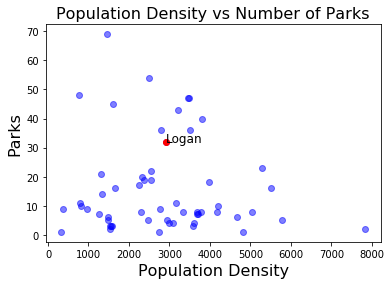

In [19]:
logan_df = total_filtered_df.loc['Logan',:]

plt.scatter(total_filtered_df.population_density, total_filtered_df.parks,  alpha=0.5, color="blue")
# set x-axis label and specific size
plt.xlabel('Population Density',size=16)
# set y-axis label and specific size
plt.ylabel('Parks',size=16)
# set plot title with specific size
plt.title('Population Density vs Number of Parks',size=16)

# Make Logan a different color
plt.scatter(logan_df.population_density, logan_df.parks, color="red")

plt.savefig('Population Density vs Number of Parks.png', dpi=150)

style = dict(size=12, color='black')
plt.text(2919.068925, 32, "Logan", **style)

### Correlation Calculation between Population Density and Number of Parks

In [20]:
scipy.stats.pearsonr(total_filtered_df['parks'], total_filtered_df['population_density'])[0]

-0.09630676201548088

### Medium Income

Text(38412.0, 32, 'Logan')

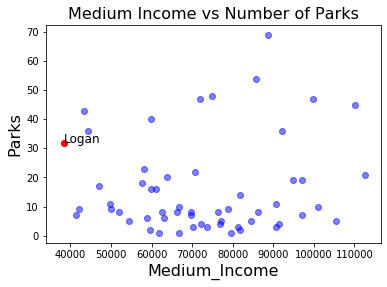

In [21]:
logan_df = total_filtered_df.loc['Logan',:]

plt.scatter(total_filtered_df.medium_income, total_filtered_df.parks,  alpha=0.5, color="blue")
# set x-axis label and specific size
plt.xlabel('Medium_Income',size=16)
# set y-axis label and specific size
plt.ylabel('Parks',size=16)
# set plot title with specific size
plt.title('Medium Income vs Number of Parks',size=16)

# Make Logan a different color
plt.scatter(logan_df.medium_income, logan_df.parks, color="red")

plt.savefig('Medium Income vs Number of Parks.png', dpi=150)

style = dict(size=12, color='black')
plt.text(38412.0, 32, "Logan", **style)

In [20]:
scipy.stats.pearsonr(total_filtered_df['parks'], total_filtered_df['medium_income'])[0]

0.09904911981911688

### Correlation Heat Map

In [22]:
heatmap_df = total_filtered_df[['population', 'park_acres', 'parks', 'sqmile', 'total_acres','medium_income','population_density']]


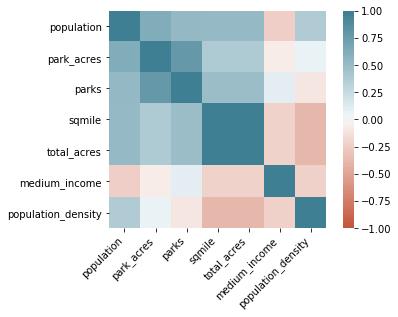

In [23]:
corr = heatmap_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### Bar graph 
### One standard is one acre of recreation land per 100 population from https://www.planning.org/pas/reports/report194.htm#:~:text=He%20assumed%20that%2012%2D1,66%2D2%2F3%20people

C:\Users\Rachel Anderson\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Rachel Anderson\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


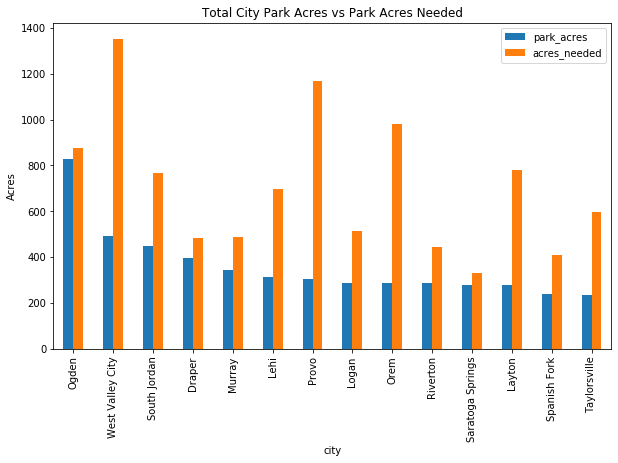

In [24]:
bar_df= total_filtered_df[['population', 'park_acres']]
bar_df['acres_needed']=bar_df['population']/100

### Fliter data to look at cities closted in size to Logan
bar_df = bar_df.query('200 <= park_acres <= 1000')

bar_cal_df = bar_df[['park_acres', 'acres_needed']]
bar_cal_df.sort_values(by=['park_acres'], inplace = True, ascending = False)

bar_cal_df.plot(kind='bar', figsize=(10, 6),)

plt.xlabel('city') # add to x-label to the plot
plt.ylabel('Acres') # add y-label to the plot
plt.title('Total City Park Acres vs Park Acres Needed') # add title to the plot

plt.show()

### Line graph to show what percentage of the city is dedicated to parks

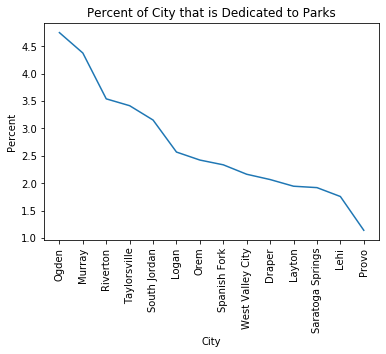

In [25]:
percent_df= total_filtered_df[['total_acres', 'park_acres']]

### Fliter data to look at cities closted in size to Logan
percent_df = percent_df.query('200 <= park_acres <= 1000')
percent_df['percent_parkland']=(percent_df['park_acres']/percent_df['total_acres'])*100
percent_df.sort_values(by=['percent_parkland'], ascending = False, inplace = True)

plt.xlabel('City') # add to x-label to the plot
plt.xticks(rotation=90) # Rotate x ticks

plt.ylabel('Percent') # add y-label to the plot

plt.title('Percent of City that is Dedicated to Parks') # add title to the plot

plt.plot(percent_df['percent_parkland'])


In [26]:
percent_df

,total_acres,park_acres,percent_parkland
city,,,
Ogden,17440.64,827.910382,4.747018
Murray,7886.72,345.044318,4.375004
Riverton,8085.12,286.100818,3.538609
Taylorsville,6945.28,237.085486,3.413620
South Jordan,14216.96,448.110334,3.151942
Logan,11300.48,290.193476,2.567975
Orem,11825.28,286.401291,2.421941
Spanish Fork,10257.92,239.533528,2.335108
West Valley City,22697.60,490.927089,2.162903
